# What is the most optimal skill to learn for Data Analysts? 

Methodology: 
1. Group skills to determine median salary and likelihood of being in a job posting 
2. Visualize median salary vs percent skill demand 
3. Determine if certain technologies are  more prevalent


In [19]:
# importing libraries/Loading data/minor data cleanup 
import ast
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
df = pd.read_csv(r'C:\Users\nickg\Desktop\Python\Data\data_jobs.csv')
df['job_posted_date']= pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

ImportError: cannot import name 'PercentFormatter' from 'matplotlib' (c:\Users\nickg\anaconda3\Lib\site-packages\matplotlib\__init__.py)

In [2]:
# filter for Data Analyst Job postings within the United States
df_us = df[(df['job_country']== 'United States') & (df['job_title_short']== 'Data Analyst')].copy()

In [3]:
# Drop na values
df_us = df_us.dropna(subset=['salary_year_avg'])
#explode skills 
df_us_exploded = df_us.explode('job_skills')
#view the explosion 
df_us_exploded['job_skills'].head()

109     python
109          r
109    alteryx
109    tableau
180      excel
Name: job_skills, dtype: object

In [4]:
# create a group by aggregation on skills count and median average yearly salary 
df_skills = df_us_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
#rename columns for ease of viewing 
df_skills = df_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})
#viewing changes
df_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
couchbase,1,160515.0
chainer,1,100000.0
chef,1,85000.0


In [7]:
# add a skill percentage column into the dataframe
# we will use the original df_us dataframe to get a count of the total job postings then divide the skills count by that 
job_count = len(df_us)

# add the column to our skills dataframe 
df_skills['skill_percent'] = (df_skills['skill_count'] / job_count* 100).round(2)


In [9]:
# filter for skills greater than 5% of occurance 
skill_percent = 5 
# adding the filter 
df_high_demand_skills = df_skills[df_skills['skill_percent'] > skill_percent]
df_high_demand_skills #viewing

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.66
excel,1808,84392.00,41.56
python,1431,97500.00,32.90
tableau,1364,92875.00,31.36
sas,926,90000.00,21.29
r,893,92500.00,20.53
power bi,838,90000.00,19.26
powerpoint,462,85000.00,10.62
word,461,81194.75,10.60


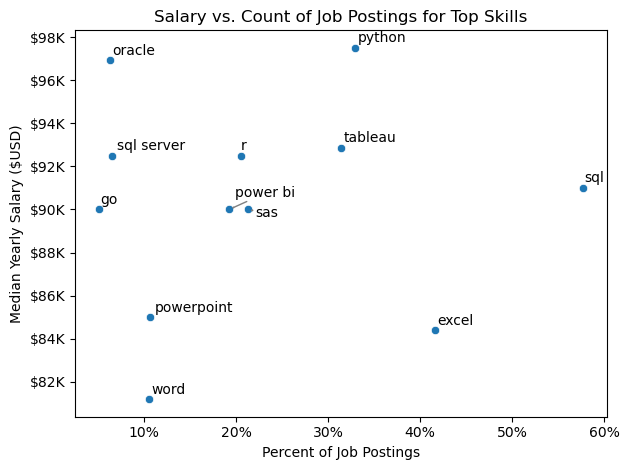

In [23]:
#formatting y axis #func.formatter
from adjustText import adjust_text
sns.scatterplot(data=df_high_demand_skills, x='skill_percent', y='median_salary')
# df_high_demand_skills.plot(kind='scatter', x='skill_percent', y='median_salary')
texts = [] #adding text to each plot in a scatter 
for i, txt in enumerate(df_high_demand_skills.index): 
   texts.append(plt.text(df_high_demand_skills['skill_percent'].iloc[i], df_high_demand_skills['median_salary'].iloc[i], txt )) # setting x values, yvalues, txt

# adjustText to avoid overlapping 
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

ax = plt.gca() # getting the current axis to format 
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')) # formatting number to currency on y-axis 
from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0)) # changing x-axis to percent 
plt.ylabel('Median Yearly Salary ($USD)')
plt.xlabel('Percent of Job Postings')
plt.title('Salary vs. Count of Job Postings for Top Skills')
plt.tight_layout()
plt.show()

In [24]:
# we want our scatter to be sectioned by the type of skill (Programming, Analyst Tool, Database)
# we already have this information in our job_type_skills column 
df['job_type_skills'].head()

0                                                  NaN
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
Name: job_type_skills, dtype: object

In [25]:
# lets modify this column so that we can use it as a legend in our scatter plot
df_technology = df['job_type_skills'].copy()
# remove duplicates 
df_technology = df_technology.drop_duplicates()
# remove nan values 
df_technology = df_technology.dropna()

In [26]:
# combine all of the dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row) #converting string to dictionary 
    for key, value in row_dict.items(): 
        if key in technology_dict:
            technology_dict[key] += value # if key already exists, add the value
        else: 
            technology_dict[key] = value # if the key does not exist, add both the key and value for each row in the dataframe 
# remove duplicates by converting values to set, then back to a list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

#view all changes 
technology_dict
# lastly we need to change this to a dataframe the explode the skills from each technology 

{'analyst_tools': ['alteryx',
  'powerbi',
  'cognos',
  'outlook',
  'looker',
  'ssis',
  'splunk',
  'sas',
  'spreadsheet',
  'ms access',
  'powerpoint',
  'spss',
  'esquisse',
  'visio',
  'datarobot',
  'nuix',
  'sap',
  'sheets',
  'dax',
  'ssrs',
  'power bi',
  'excel',
  'qlik',
  'microstrategy',
  'word',
  'sharepoint',
  'msaccess',
  'tableau'],
 'programming': ['css',
  'visualbasic',
  'delphi',
  'julia',
  'ruby',
  'groovy',
  'go',
  'c#',
  'sql',
  'swift',
  'golang',
  'html',
  'rust',
  'pascal',
  'sas',
  'f#',
  'sass',
  'visual basic',
  'kotlin',
  'no-sql',
  'solidity',
  'bash',
  'ocaml',
  'lua',
  'dart',
  't-sql',
  'vb.net',
  'c',
  'lisp',
  'erlang',
  'crystal',
  'java',
  'scala',
  'c++',
  'assembly',
  'apl',
  'php',
  'perl',
  'clojure',
  'matlab',
  'powershell',
  'mongo',
  'elixir',
  'haskell',
  'javascript',
  'objective-c',
  'shell',
  'mongodb',
  'r',
  'typescript',
  'cobol',
  'nosql',
  'python',
  'fortran',
  '

In [28]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])
df_technology

,technology,skills
0,analyst_tools,"[alteryx, powerbi, cognos, outlook, looker, ss..."
1,programming,"[css, visualbasic, delphi, julia, ruby, groovy..."
2,cloud,"[aurora, databricks, colocation, linode, herok..."
3,libraries,"[hadoop, shogun, scikit-learn, ionic, hugging ..."
4,other,"[homebrew, atlassian, yarn, gitlab, unity, doc..."
5,databases,"[neo4j, cassandra, sqlserver, mongodb, firebas..."
6,os,"[kali, fedora, arch, unix, wsl, suse, ubuntu, ..."
7,async,"[jira, asana, confluence, trello, monday.com, ..."
8,webframeworks,"[asp.net, express, drupal, flask, ruby, fastif..."
9,sync,"[google chat, microsoft teams, symphony, rocke..."


In [29]:
# explode these skills 
df_technology = df_technology.explode('skills')

df_technology # we can now merge this to our original dataframe. 

,technology,skills
0,analyst_tools,alteryx
0,analyst_tools,powerbi
0,analyst_tools,cognos
0,analyst_tools,outlook
0,analyst_tools,looker
...,...,...
9,sync,slack
9,sync,wire
9,sync,zoom
9,sync,twilio


In [35]:
# merging our skills dataframe and adding our new technology column to use as a legend
df_high_demand_skills.merge(df_technology, left_on='job_skills', right_on='skills') 
# set this as our plotting data frame 
df_plot = df_high_demand_skills.merge(df_technology, left_on='job_skills', right_on='skills') 

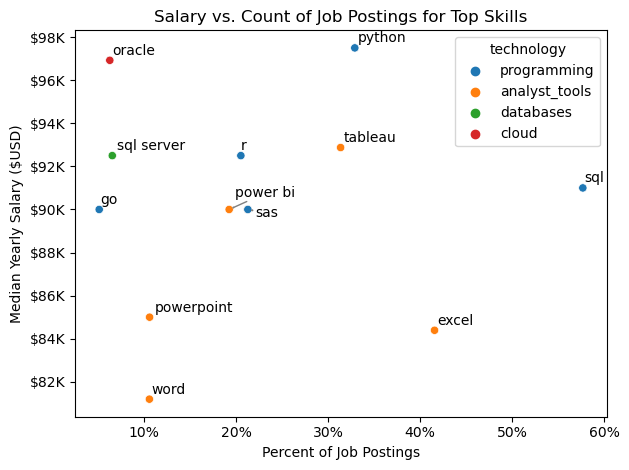

In [38]:
# reusing our code above 

from adjustText import adjust_text # adding library for text label formatting on our values
#plotting the scatter
sns.scatterplot(data=df_plot, x='skill_percent', y='median_salary', hue='technology')
texts = [] #adding text to each plot in a scatter 
for i, txt in enumerate(df_high_demand_skills.index): 
   texts.append(plt.text(df_high_demand_skills['skill_percent'].iloc[i], df_high_demand_skills['median_salary'].iloc[i], txt )) # setting x values, yvalues, txt

# adjustText to avoid overlapping 
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

ax = plt.gca() # getting the current axis to format 
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')) # formatting number to currency on y-axis 
from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0)) # changing x-axis to percent 
plt.ylabel('Median Yearly Salary ($USD)')
plt.xlabel('Percent of Job Postings')
plt.title('Salary vs. Count of Job Postings for Top Skills')
plt.tight_layout()
plt.show()